In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces 
import numpy as np 
from scipy.spatial import distance 
import math
from scipy.sparse import csr_matrix 
from sklearn.cluster import KMeans 
from sklearn.metrics import pairwise_distances 

In [2]:
#Data
ORL = datasets.fetch_olivetti_faces()
X=ORL.data 
y=ORL.target 
X.shape, y.shape 

((400, 4096), (400,))

<Figure size 432x288 with 0 Axes>

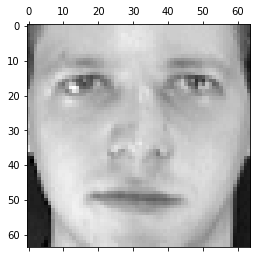

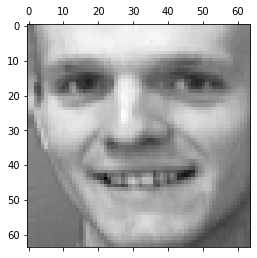

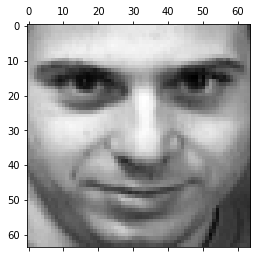

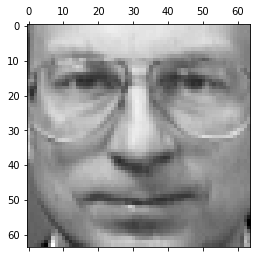

In [3]:
#Plot
plt.gray() 
plt.matshow(ORL.images[0]) 
plt.matshow(ORL.images[40]) 
plt.matshow(ORL.images[80]) 
plt.matshow(ORL.images[120])

In [4]:
#centroid
a=np.zeros(X.shape[1])
for i in range(0,X.shape[1]):
    a[i]=np.dot(X.T[i],np.ones(X.shape[0]))/X.shape[0]
a=np.matrix(a)
a.shape

(1, 4096)

In [5]:
#radius
dists = distance.cdist(X, a, 'euclidean')
R=np.max(dists)
R

13.99719168902701

In [6]:
# Inverse Stereographic Projection
Xf=np.zeros((X.shape[0],X.shape[1]))
Xe=np.zeros((X.shape[0]))
for i in range(0,X.shape[0]):
    Xe[i]=R*((np.dot(X[i]**2,np.ones(X.shape[1]))-math.pow(R,2))/((np.dot(X[i]**2,np.ones(X.shape[1])))+math.pow(R,2)))
    Xf[i]=R*(2*R/((np.dot(X[i]**2,np.ones(X.shape[1])))+math.pow(R,2))*X[i])
    
X=np.column_stack((Xf, Xe)) 
X.shape

(400, 4097)

In [7]:
#Distance matrix
A=np.dot(X,X.T)/(R**2)
for i in range(0,X.shape[0]):
        A[i][i]=int(1)
A=R*np.arccos(A)
A.shape

(400, 400)

In [8]:
# get indices and sorted distances
k=4
DNN, NN = np.sort(A), np.argsort(A)
NN = NN[:,1:k+1]
DNN = DNN[:,1:k+1]

In [9]:
#Similarity Matrix
W=csr_matrix((X.shape[0], X.shape[0])).toarray()
for i in range(W.shape[0]):
    for j in range(W.shape[0]):
        if (j in NN[i]):
            W[i][j] = np.exp(-(A[i,j]**2)/10000)
        else:
            W[i][j]=0
W=(W+W.T)/2

In [10]:
# degree matrix
D = np.diag(np.sum(np.array(W), axis=1))
print('degree matrix:')
print(D)
# laplacian matrix
L = D - W
print('laplacian matrix:')
print(L)

degree matrix:
[[5.99863403 0.         0.         ... 0.         0.         0.        ]
 [0.         4.49827953 0.         ... 0.         0.         0.        ]
 [0.         0.         3.49912214 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 3.49912236 0.         0.        ]
 [0.         0.         0.         ... 0.         3.99906962 0.        ]
 [0.         0.         0.         ... 0.         0.         4.49887542]]
laplacian matrix:
[[ 5.99863403  0.         -0.9998197  ...  0.          0.
   0.        ]
 [ 0.          4.49827953  0.         ...  0.          0.
   0.        ]
 [-0.9998197   0.          3.49912214 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  3.49912236  0.
   0.        ]
 [ 0.          0.          0.         ...  0.          3.99906962
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   4.49887542]]


In [11]:
# eigenvalues
e, v = np.linalg.eig(L)
idx=np.argsort(e)
e=e[idx]

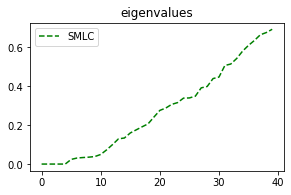

In [12]:
#The 40 smallest eigenvalues of the SLMC Laplacian matrice 
fig = plt.figure(figsize=[10, 6])
ax1 = plt.subplot(222)
plt.plot(e.real[0:40],color='green',linestyle='dashed', label='SMLC')
ax1.title.set_text('eigenvalues')
plt.legend()

In [13]:
#clustering
U = np.array(v.real[:,idx[0:40]])
km = KMeans(init='k-means++', n_clusters=40)
km.fit(U)

KMeans(n_clusters=40)

In [14]:
#NMI value
from sklearn.metrics.cluster import normalized_mutual_info_score
normalized_mutual_info_score(y,km.labels_,average_method='arithmetic')

0.8400174954590627